# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [3]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [6]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [13]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

model = SVR()
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.20236116717854669
평가 데이터 점수 : 0.1777735823142953


### SVM을 사용한 분류 모델 (SVC)

In [17]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

model = SVC()
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9295774647887324
평가 데이터 점수 : 0.8741258741258742


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [20]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svr = SVR(kernel = 'linear')
linear_svr.fit(X_train, y_train)

print('Linear SVR 학습 데이터 점수 : {}'.format(linear_svr.score(X_train, y_train)))
print('Linear SVR 평가 데이터 점수 : {}'.format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel = 'poly')
polynomial_svr.fit(X_train, y_train)

print('Polynomial SVR 학습 데이터 점수 : {}'.format(polynomial_svr.score(X_train, y_train)))
print('Polynomial SVR 평가 데이터 점수 : {}'.format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel = 'rbf')
rbf_svr.fit(X_train, y_train)

print('RBF SVR 학습 데이터 점수 : {}'.format(rbf_svr.score(X_train, y_train)))
print('RBF SVR 평가 데이터 점수 : {}'.format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수 : 0.7155066205123104
Linear SVR 평가 데이터 점수 : 0.6380398541381507
Polynomial SVR 학습 데이터 점수 : 0.2024454261446289
Polynomial SVR 평가 데이터 점수 : 0.133668450367462
RBF SVR 학습 데이터 점수 : 0.21772837063748762
RBF SVR 평가 데이터 점수 : 0.13544178468518187


In [22]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svc = SVC(kernel = 'linear')
linear_svc.fit(X_train, y_train)

print('Linear SVC 학습 데이터 점수 : {}'.format(linear_svc.score(X_train, y_train)))
print('Linear SVC 평가 데이터 점수 : {}'.format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel = 'poly')
polynomial_svc.fit(X_train, y_train)

print('Polynomial SVC 학습 데이터 점수 : {}'.format(polynomial_svc.score(X_train, y_train)))
print('Polynomial SVC 평가 데이터 점수 : {}'.format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel = 'rbf')
rbf_svc.fit(X_train, y_train)

print('RBF SVC 학습 데이터 점수 : {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 점수 : {}'.format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수 : 0.960093896713615
Linear SVC 평가 데이터 점수 : 0.986013986013986
Polynomial SVC 학습 데이터 점수 : 0.9014084507042254
Polynomial SVC 평가 데이터 점수 : 0.9230769230769231
RBF SVC 학습 데이터 점수 : 0.9014084507042254
RBF SVC 평가 데이터 점수 : 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [23]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [24]:
polynomial_svc = SVC(kernel = 'poly', degree = 2, C = .1, gamma = 'auto')
polynomial_svc.fit(X_train, y_train)

print('kernal = poly, degree = {}, c = {}, gamma = {}'.format(2, .1, 'auto'))
print('Polynomial SVC 학습 데이터 점수 : {}'.format(polynomial_svc.score(X_train, y_train)))
print('Polynomial SVC 평가 데이터 점수 : {}'.format(polynomial_svc.score(X_test, y_test)))

kernal = poly, degree = 2, c = 0.1, gamma = auto
Polynomial SVC 학습 데이터 점수 : 0.9835680751173709
Polynomial SVC 평가 데이터 점수 : 0.993006993006993


In [25]:
rbf_svc = SVC(kernel = 'rbf', C = 2.0, gamma = 'scale')
rbf_svc.fit(X_train, y_train)

print('kernal = rbf, c = {}, gamma = {}'.format(2, 'scale'))
print('RBF SVC 학습 데이터 점수 : {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 점수 : {}'.format(rbf_svc.score(X_test, y_test)))

kernal = rbf, c = 2, gamma = scale
RBF SVC 학습 데이터 점수 : 0.9154929577464789
RBF SVC 평가 데이터 점수 : 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [26]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [27]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9014084507042254
SVC 평가 데이터 점수 : 0.9230769230769231


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9835680751173709
SVC 평가 데이터 점수 : 0.986013986013986


In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수 : 0.9812206572769953
SVC 평가 데이터 점수 : 0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [32]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [36]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7284509884056241
평가 데이터 점수 : 0.6080368323158101


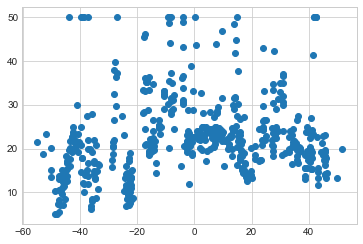

In [37]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y);

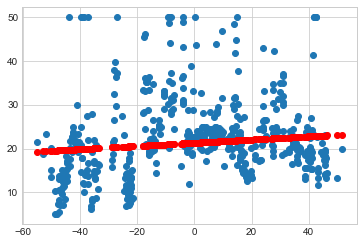

In [39]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [40]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(estimator = estimator,
              X = X, y = y,
              cv = 5, n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.8s finished


{'fit_time': array([0.01951456, 0.02393675, 0.01698446, 0.01595736, 0.01994658]),
 'score_time': array([0.00398517, 0.00199461, 0.00199389, 0.00199437, 0.00501752]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [41]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, .1, .01],
              'model__epsilon' : [1.0, .1, .01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [42]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병

In [57]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [60]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.5010650191432612
평가 데이터 점수 : 0.531123834778918


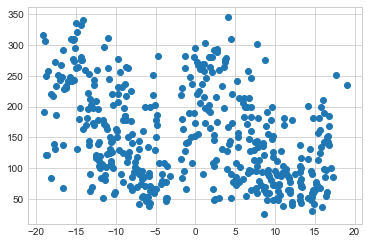

In [61]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y);

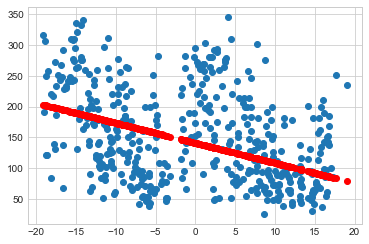

In [62]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [65]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(estimator = estimator,
              X = X, y = y,
              cv = 5, n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01012492, 0.00649095, 0.007972  , 0.00797868, 0.00797772]),
 'score_time': array([0.00199509, 0.00199485, 0.00099826, 0.00099802, 0.00099778]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [66]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, .1, .01],
              'model__epsilon' : [1.0, .1, .01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [67]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 보스턴 주택 가격

In [68]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

SVR()

In [71]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6647811408983005
평가 데이터 점수 : 0.6575100156814007


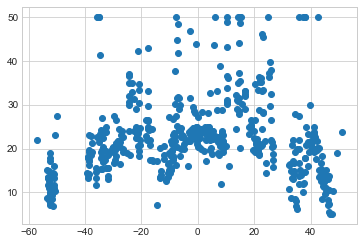

In [72]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y);

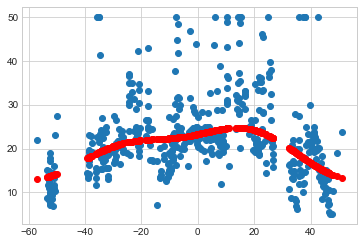

In [73]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [74]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(estimator = estimator,
              X = X, y = y,
              cv = 5, n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.6s finished


{'fit_time': array([0.01595616, 0.01695371, 0.0151422 , 0.01595616, 0.01627612]),
 'score_time': array([0.00503206, 0.00603056, 0.00498629, 0.0048542 , 0.01049972]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [77]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)
gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.17631266        nan 0.14981591]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=4,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [81]:
gs.best_params_

{'model__kernel': 'rbf'}

In [82]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [83]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, .1, .01],
              'model__epsilon' : [1.0, .1, .01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [85]:
gs.best_params_

{'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}

### 당뇨병

In [90]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [91]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

SVR()

In [93]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.18946233028436832
평가 데이터 점수 : 0.13704182505518747


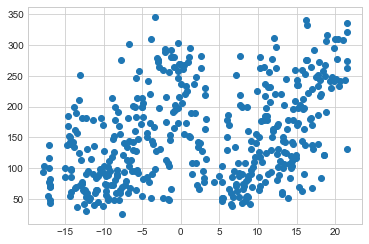

In [94]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y);

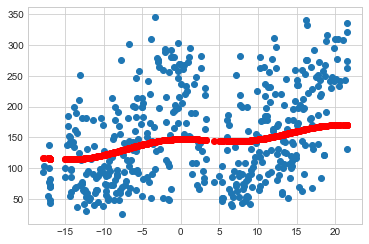

In [95]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [96]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(estimator = estimator,
              X = X, y = y,
              cv = 5, n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00895762, 0.00995588, 0.02294922, 0.01695442, 0.00997305]),
 'score_time': array([0.00498652, 0.00398827, 0.0050025 , 0.00498819, 0.00401568]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [97]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'rbf'))])

param_grid = [{'model__kernel' : ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)
gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.14659936        nan 0.34913589]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=4,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [98]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [99]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel = 'sigmoid'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, .1, .01],
              'model__epsilon' : [1.0, .1, .01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [100]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [101]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [102]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.39454909731131926
평가 데이터 점수 : 0.33784422292628813


## Linear SVC

### 유방암

In [103]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [104]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [106]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9912087912087912
평가 데이터 점수 : 0.9649122807017544


In [107]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

In [108]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [111]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

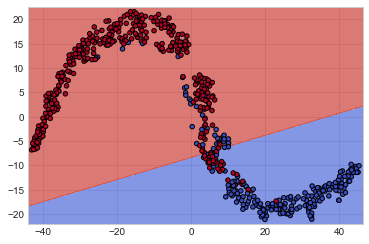

In [112]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

In [114]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator,
              X = X, y = y,
              cv = 5, n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00496936, 0.0039885 , 0.0039885 , 0.00398874, 0.00301838]),
 'score_time': array([0.00099754, 0.        , 0.00099754, 0.00099778, 0.00099683]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [115]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, .1, .01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [117]:
gs.best_params_

{'model__C': 0.1, 'model__gamma': 'scale'}

## Kernel SVC

### 유방암

In [118]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [119]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [123]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9846153846153847
평가 데이터 점수 : 0.9824561403508771


In [124]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

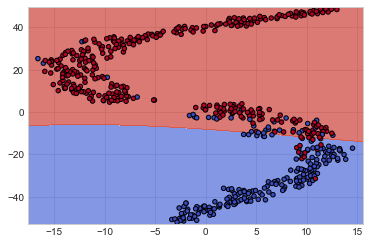

In [125]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

In [126]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(estimator = estimator,
              X = X, y = y,
              cv = 5, n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.5s finished


{'fit_time': array([0.01166534, 0.00508547, 0.00578451, 0.00613856, 0.005759  ]),
 'score_time': array([0.00061774, 0.0009973 , 0.        , 0.        , 0.00402069]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [127]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel = 'rbf'))])

param_grid = [{'model__gamma' : ['scale', 'auto'],
              'model__C' : [1.0, .1, .01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [129]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [131]:
gs.best_params_

{'model__C': 1.0, 'model__gamma': 'scale'}